In [1]:
#下载数据集并解压
!wget https://filerepo.idzcn.com/dataset/assignment_1.zip
!unzip assignment_1.zip

--2023-11-15 02:41:45--  https://filerepo.idzcn.com/dataset/assignment_1.zip
Resolving filerepo.idzcn.com (filerepo.idzcn.com)... 114.232.92.41, 124.239.243.41, 111.225.213.41, ...
Connecting to filerepo.idzcn.com (filerepo.idzcn.com)|114.232.92.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘assignment_1.zip’

assignment_1.zip    100%[===================>]  65.95M  4.11MB/s    in 18s     

2023-11-15 02:42:04 (3.67 MB/s) - ‘assignment_1.zip’ saved [69155672/69155672]

Archive:  assignment_1.zip
  inflating: creditcard.csv          


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
#读取数据集
df=pd.read_csv("creditcard.csv")
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [4]:
#缺省值判断
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#对Amount和Time进行归一化处理
from sklearn.preprocessing import StandardScaler
df['scaled_amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount','Time'],axis=1,inplace=True)#删除Amount和Time
df.head

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<bound method NDFrame.head of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V22       V23  \
0       0.239599  0.098698  0.

In [6]:
#查看正常交易数据和欺诈交易数据的数量
print("正常交易数据：",len(df[df["Class"]==0]))
print("欺诈交易数据：",len(df[df["Class"]==1]))

正常交易数据： 284315
欺诈交易数据： 492


In [7]:
#分离特征和标签
X=df.drop("Class",axis=1)
y=df["Class"]

In [8]:
#针对正负样本数量极不平衡，这里采用SMOTE+undersampling解决数据不平衡
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#over
over=SMOTE(sampling_strategy=0.1)
#under
under=RandomUnderSampler(sampling_strategy=1)
#pipeline
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
X_new,y_new=pipeline.fit_resample(X,y)
y_new.value_counts()

Class
0    28431
1    28431
Name: count, dtype: int64

In [9]:
#分离训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42)
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [10]:
#根据已学习的机器学习算法，这里分别采用逻辑回归、决策树、随机森林、XGBoost对数据进行训练,以AUPRC作为衡量标准
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.model_selection import cross_val_score #交叉验证计算accuracy
from sklearn.model_selection import GridSearchCV #网格搜索，获取最优参数
from sklearn.model_selection import StratifiedKFold #交叉验证
from xgboost import XGBClassifier #极限梯度提升树

#评估指标
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

In [11]:
import time
#逻辑回归
def LR_gs(X_train,y_train):
    LR_param={
        'penalty':['l1','l2'],
        'C':np.logspace(-3, 3, 7)
    }
    LR_gs=GridSearchCV(LogisticRegression(),param_grid=LR_param,n_jobs=-1,scoring='average_precision')
    LR_gs.fit(X_train,y_train)
    LR_estimators=LR_gs.best_estimator_ #最优参数
    LR_best_params=LR_gs.best_params_
    print(LR_best_params)
    return LR_estimators
dt_start = time.time()
LR_best_estimator=LR_gs(X_train,y_train)
print("逻辑回归模型用时：",time.time()-dt_start)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel

{'C': 0.1, 'penalty': 'l2'}
逻辑回归模型用时： 18.343029975891113


In [12]:
#决策树
def DT_gs(X_train,y_train):
    DT_param={
        'criterion':['gini','entrogy'],#衡量标准
        'max_depth':[5,10,15,20],#最大深度
        'min_samples_leaf':list(range(3,10,1))#最小叶子节点数
    }
    DT_gs=GridSearchCV(DecisionTreeClassifier(),param_grid=DT_param,n_jobs=-1,scoring='average_precision')
    DT_gs.fit(X_train,y_train)
    DT_estimators=DT_gs.best_estimator_
    DT_best_params=DT_gs.best_params_
    print(DT_best_params)
    return DT_estimators
dt_start=time.time()
DT_best_estimator=DT_gs(X_train,y_train)
print("决策树模型用时：",time.time()-dt_start)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 9}
决策树模型用时： 23.55903172492981


In [13]:
#随机森林
def RFC_gs(X_train,y_train):
    RFC_param={
        'n_estimators':[100,150,200],#多少棵树
        'criterion':['gini','entrogy'],#衡量标准
        'max_depth':[5,10,15,20],#最大深度
        'min_samples_split':list(range(2,10,1))#最小分割样本
    }
    RFC_gs=GridSearchCV(RandomForestClassifier(),param_grid=RFC_param,n_jobs=-1,scoring='average_precision')
    RFC_gs.fit(X_train,y_train)
    RFC_estimators=RFC_gs.best_estimator_
    RFC_best_params=RFC_gs.best_params_
    print(RFC_best_params)
    return RFC_estimators
dt_start=time.time()
RFC_best_estimator=RFC_gs(X_train,y_train) 
print("随机森林模型用时：",time.time()-dt_start)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
随机森林模型用时： 146.19426918029785


In [14]:
#xgb
def XGB_gs(X_train,y_train):
    XGB_param={
        'max_depth':[5,10,15,20],
        'n_estimators': [50, 100, 150,200]
    }
    XGB_gs=GridSearchCV(XGBClassifier(),param_grid=XGB_param,n_jobs=-1,scoring='average_precision')
    XGB_gs.fit(X_train,y_train)
    XGB_estimators=XGB_gs.best_estimator_
    XGB_best_params=XGB_gs.best_params_
    print(XGB_best_params)
    return XGB_estimators
dt_start=time.time()
XGB_best_estimator=XGB_gs(X_train,y_train) 
print("XGBoost模型用时：",time.time()-dt_start)

{'max_depth': 20, 'n_estimators': 200}
XGBoost模型用时： 226.62975406646729


In [15]:
#预测训练集
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

result_df=pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC_ROC','AUPRC'],
                       index=['LR','DT','RFC','XGB'])

def caculate(models,X_test,y_test):
    #计算各种参数的值
    Accuracy_result=[]
    F1_score_result=[]
    Recall_result=[]
    Precision_result=[]
    AUC_ROC_result=[]
    AUPRC_result=[]
    
    for model in models:
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred) #计算准确率
        precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)#计算精确度，召回率，f1
        auc_roc=roc_auc_score(y_test, y_pred)  # 计算AUC
        auprc = average_precision_score(y_test, y_pred)#计算AUPRC
        
        Accuracy_result.append(accuracy)
        Precision_result.append(precision)
        Recall_result.append(recall)
        F1_score_result.append(f1_score)
        AUC_ROC_result.append(auc_roc)
        AUPRC_result.append(auprc)
        
    return Accuracy_result,F1_score_result,Recall_result,Precision_result,AUC_ROC_result,AUPRC_result

In [16]:
#经测试集训练出的各模型的测试结果
best_models=[LR_best_estimator,DT_best_estimator,RFC_best_estimator,XGB_best_estimator]

Accuracy_results,F1_results,Recall_results,Precision_results,AUC_ROC_results,AUPRC_results=caculate(best_models,X_test,y_test)

result_df['Accuracy']=Accuracy_results
result_df['F1-score']=F1_results
result_df['Recall']=Recall_results
result_df['Precision']=Precision_results
result_df['AUC_ROC']=AUC_ROC_results
result_df['AUPRC']=AUPRC_results
result_df

,Accuracy,F1-score,Recall,Precision,AUC_ROC,AUPRC
LR,0.945045,"[0.946457637282618, 0.9435563984466722]","[0.9771802582699451, 0.9132867132867133]","[0.9176079734219269, 0.9759013637212778]",0.945233,0.934890
DT,0.981359,"[0.9813314547375838, 0.981387181738367]","[0.9856713249601982, 0.9770979020979021]","[0.9770296335262143, 0.9857142857142858]",0.981385,0.974658
RFC,0.998329,"[0.9983208130799823, 0.9983378532061937]","[0.9991155138864319, 0.9975524475524475]","[0.9975273754856941, 0.9991244965855367]",0.998334,0.997910
XGB,0.998945,"[0.9989380530973453, 0.9989515988118121]","[0.9984079249955776, 0.9994755244755245]","[0.9994687444660882, 0.9984282221446036]",0.998942,0.998168


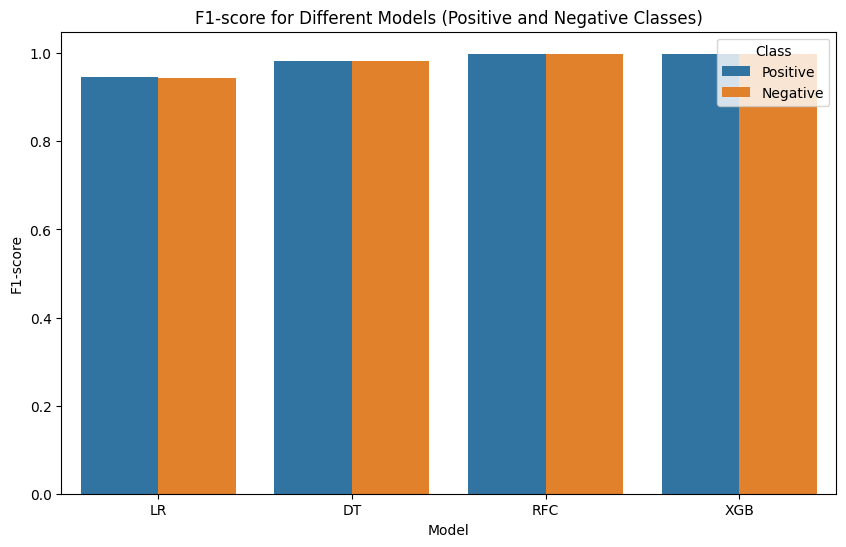

In [17]:
#F1-score的可视化
import seaborn as sns
import matplotlib.pyplot as plt

# 将 F1-score 列中的两个值拆分为两列，命名为 F1-score_Pos 和 F1-score_Neg
result_df[['F1-score_Pos', 'F1-score_Neg']] = pd.DataFrame(result_df['F1-score'].tolist(), index=result_df.index)

# 创建一个新的 DataFrame 以便 seaborn 能够正确处理数据
f1_data = pd.DataFrame({
    'Model': result_df.index.tolist() * 2,  # 乘以 2 是因为每个模型有两个 F1-score
    'F1-score': result_df['F1-score_Pos'].values.tolist() + result_df['F1-score_Neg'].values.tolist(),
    'Class': ['Positive'] * len(result_df) + ['Negative'] * len(result_df)  # 添加一个表示类别的列
})

# 绘制 F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score', hue='Class', data=f1_data)
plt.title('F1-score for Different Models (Positive and Negative Classes)')
plt.show()


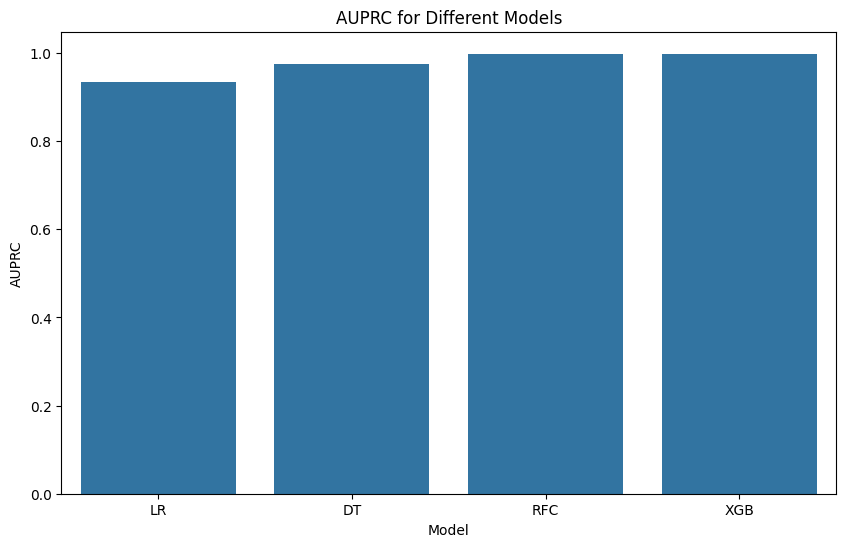

In [18]:
#AUPRC的可视化
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个新的 DataFrame 以便 seaborn 处理数据
auprc_data = pd.DataFrame({
    'Model': result_df.index.tolist(),
    'AUPRC': result_df['AUPRC'].values
})

# 绘制 AUPRC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUPRC', data=auprc_data)
plt.title('AUPRC for Different Models')
plt.show()


In [19]:
#根据以上结果选择RFC和XGB进行集成
RFC_test=pd.Series(RFC_best_estimator.predict(X_test),name="RFC")
XGB_test=pd.Series(XGB_best_estimator.predict(X_test),name="XGB")
ensemble_results=pd.concat([RFC_test,XGB_test],axis=1)
ensemble_results

,RFC,XGB
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
11368,0,0
11369,0,0
11370,1,1
11371,1,1


In [20]:
#集成RFC和XGB模型
from sklearn.ensemble import VotingClassifier
voting_model=VotingClassifier(estimators=[('RFC',RFC_best_estimator),('XGB',XGB_best_estimator)],n_jobs=-1)

In [21]:
#训练
dt_start=time.time()
voting_model.fit(X_train,y_train)
print("新模型用时：",time.time()-dt_start)

新模型用时： 28.5327889919281


In [22]:
def caculateModel(model,X_test,y_test):
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred) #计算准确率
    precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)#计算精确度，召回率，f1
    auc_roc=roc_auc_score(y_test, y_pred)  # 计算AUC
    auprc = average_precision_score(y_test, y_pred)#计算AUPRC
    return accuracy,f1_score,recall,precision,auc_roc,auprc
result_dfs=result_df
# 计算新模型的各值
Accuracy_results, F1_results, Recall_results, Precision_results, AUC_ROC_results, AUPRC_results = caculateModel(voting_model, X_test, y_test)
new_model_data = [Accuracy_results, F1_results, Recall_results, Precision_results, AUC_ROC_results, AUPRC_results,F1_results[0],F1_results[1]]
# 将new_model_data转换为DataFrame
new_model_df = pd.DataFrame([new_model_data], columns=result_df.columns, index=['Voting_Model'])
# 将新数据添加到 result_df 中
result_dfs = pd.concat([result_dfs, new_model_df])
result_dfs

,Accuracy,F1-score,Recall,Precision,AUC_ROC,AUPRC,F1-score_Pos,F1-score_Neg
LR,0.945045,"[0.946457637282618, 0.9435563984466722]","[0.9771802582699451, 0.9132867132867133]","[0.9176079734219269, 0.9759013637212778]",0.945233,0.934890,0.946458,0.943556
DT,0.981359,"[0.9813314547375838, 0.981387181738367]","[0.9856713249601982, 0.9770979020979021]","[0.9770296335262143, 0.9857142857142858]",0.981385,0.974658,0.981331,0.981387
RFC,0.998329,"[0.9983208130799823, 0.9983378532061937]","[0.9991155138864319, 0.9975524475524475]","[0.9975273754856941, 0.9991244965855367]",0.998334,0.997910,0.998321,0.998338
XGB,0.998945,"[0.9989380530973453, 0.9989515988118121]","[0.9984079249955776, 0.9994755244755245]","[0.9994687444660882, 0.9984282221446036]",0.998942,0.998168,0.998938,0.998952
Voting_Model,0.998417,"[0.9984090507336045, 0.9984254723582924]","[0.9991155138864319, 0.9977272727272727]","[0.9977035859388801, 0.999124649859944]",0.998421,0.997997,0.998409,0.998425


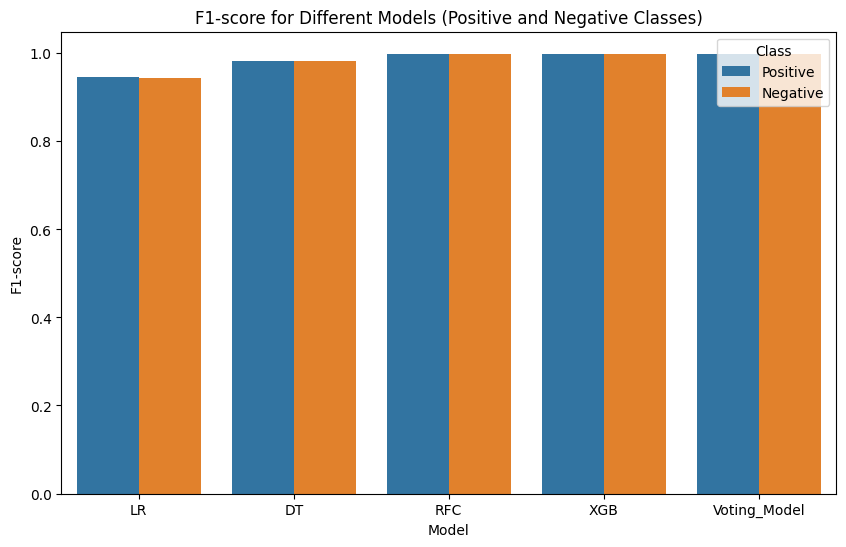

In [23]:
#F1-score的可视化
import seaborn as sns
import matplotlib.pyplot as plt

# 将 F1-score 列中的两个值拆分为两列，命名为 F1-score_Pos 和 F1-score_Neg
result_dfs[['F1-score_Pos', 'F1-score_Neg']] = pd.DataFrame(result_dfs['F1-score'].tolist(), index=result_dfs.index)

# 创建一个新的 DataFrame 以便 seaborn 能够正确处理数据
f1_data = pd.DataFrame({
    'Model': result_dfs.index.tolist() * 2,  # 乘以 2 是因为每个模型有两个 F1-score
    'F1-score': result_dfs['F1-score_Pos'].values.tolist() + result_dfs['F1-score_Neg'].values.tolist(),
    'Class': ['Positive'] * len(result_dfs) + ['Negative'] * len(result_dfs)  # 添加一个表示类别的列
})

# 绘制 F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score', hue='Class', data=f1_data)
plt.title('F1-score for Different Models (Positive and Negative Classes)')
plt.show()


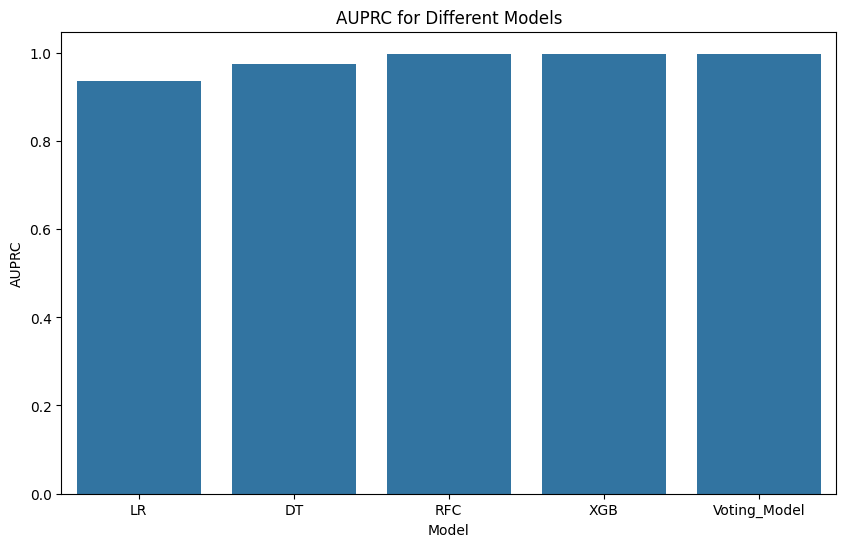

In [24]:
#AUPRC的可视化
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个新的 DataFrame 以便 seaborn 处理数据
auprc_data = pd.DataFrame({
    'Model': result_dfs.index.tolist(),
    'AUPRC': result_dfs['AUPRC'].values
})

# 绘制 AUPRC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUPRC', data=auprc_data)
plt.title('AUPRC for Different Models')
plt.show()

In [25]:
#综合来看，可选择随机森林或XGBoost，集成模型提升不显著